In [1]:
# Uploading the CSV from local system
from google.colab import files
uploaded = files.upload()

# Once uploaded, load the CSV into a DataFrame
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

# Display all columns
pd.set_option('display.max_columns', None)

# Reading the uploaded file
import io
df = pd.read_csv(io.BytesIO(uploaded['BIKE DETAILS.csv']))

# Preview the dataset
print("Shape of the dataset:", df.shape)
df.head()

Saving BIKE DETAILS.csv to BIKE DETAILS.csv
Shape of the dataset: (1061, 7)


,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN


In [6]:
# Q1: What is the range of selling prices in the dataset?
min_price = df['selling_price'].min()
max_price = df['selling_price'].max()

print(f"🔸 Selling Price Range: ₹{min_price:,} to ₹{max_price:,}")

🔸 Selling Price Range: ₹5,000 to ₹760,000


In [7]:
# Q2: What is the median selling price for bikes in the dataset?
median_price = df['selling_price'].median()
print(f"🔸 Median Selling Price: ₹{median_price:,}")

🔸 Median Selling Price: ₹45,000.0


In [8]:
# Q3: What is the most common seller type?
common_seller = df['seller_type'].mode()[0]
seller_counts = df['seller_type'].value_counts()

print(f"🔸 Most Common Seller Type: {common_seller}")
print("\n🔹 Seller Type Distribution:")
print(seller_counts)

🔸 Most Common Seller Type: Individual

🔹 Seller Type Distribution:
seller_type
Individual    1055
Dealer           6
Name: count, dtype: int64


In [9]:
# Q4: How many bikes have driven more than 50,000 kilometers?
over_50k = df[df['km_driven'] > 50000].shape[0]
print(f"🔸 Number of bikes driven over 50,000 km: {over_50k}")

🔸 Number of bikes driven over 50,000 km: 170


In [10]:
# Q5: What is the average km_driven value for each ownership type?
avg_km_by_owner = df.groupby('owner')['km_driven'].mean().round(2)

print("🔸 Average km_driven by Ownership Type:")
print(avg_km_by_owner)

🔸 Average km_driven by Ownership Type:
owner
1st owner     32816.58
2nd owner     39288.99
3rd owner     33292.18
4th owner    311500.00
Name: km_driven, dtype: float64


In [11]:
# Q6: What proportion of bikes are from the year 2015 or older?
total_bikes = df.shape[0]
older_bikes = df[df['year'] <= 2015].shape[0]
proportion = round((older_bikes / total_bikes) * 100, 2)

print(f"🔸 Proportion of bikes from 2015 or older: {proportion}%")

🔸 Proportion of bikes from 2015 or older: 56.64%


In [12]:
# Q7: What is the trend of missing values across the dataset?
missing_values = df.isnull().sum()
missing_percent = (df.isnull().sum() / df.shape[0] * 100).round(2)

missing_df = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage (%)': missing_percent
})

print("🔹 Missing Value Trend:")
print(missing_df[missing_df['Missing Values'] > 0])

🔹 Missing Value Trend:
                   Missing Values  Percentage (%)
ex_showroom_price             435            41.0


In [13]:
# Q8: What is the highest ex_showroom_price recorded, and for which bike?
max_showroom = df['ex_showroom_price'].max()
bike_row = df[df['ex_showroom_price'] == max_showroom][['name', 'ex_showroom_price']]

print("🔸 Bike with the highest ex_showroom_price:")
print(bike_row.to_string(index=False))

🔸 Bike with the highest ex_showroom_price:
                      name  ex_showroom_price
Harley-Davidson Street Bob          1278000.0


In [14]:
# Q9: What is the total number of bikes listed by each seller type?
seller_counts = df['seller_type'].value_counts()

print("🔸 Total number of bikes by Seller Type:")
print(seller_counts)

🔸 Total number of bikes by Seller Type:
seller_type
Individual    1055
Dealer           6
Name: count, dtype: int64


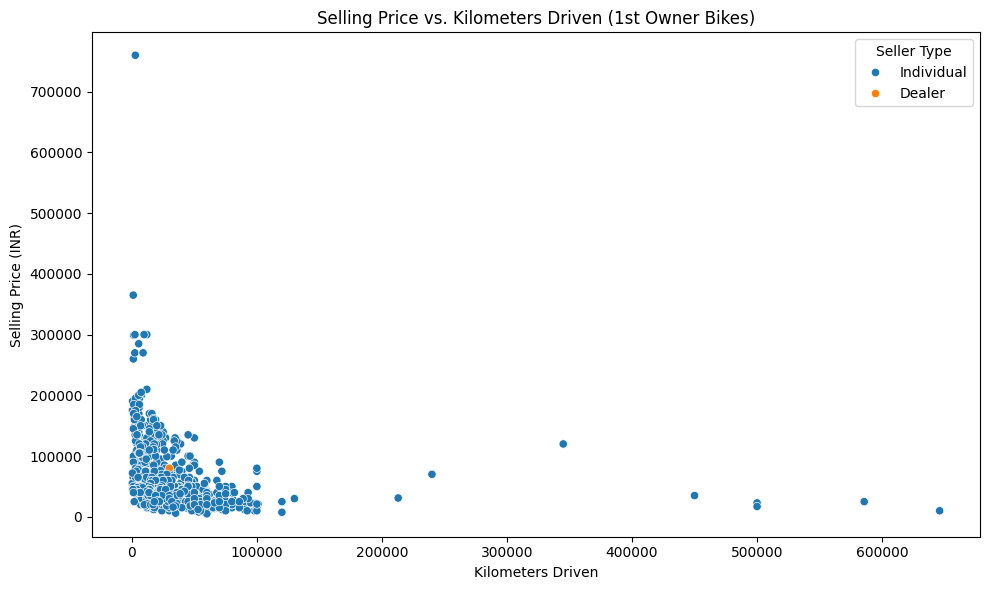

In [15]:
# Q10: What is the relationship between selling_price and km_driven for first-owner bikes?
import seaborn as sns
import matplotlib.pyplot as plt

# Filter only 1st owner bikes
first_owner_df = df[df['owner'] == '1st owner']

# Scatter plot
plt.figure(figsize=(10,6))
sns.scatterplot(data=first_owner_df, x='km_driven', y='selling_price', hue='seller_type')
plt.title('Selling Price vs. Kilometers Driven (1st Owner Bikes)')
plt.xlabel('Kilometers Driven')
plt.ylabel('Selling Price (INR)')
plt.legend(title='Seller Type')
plt.tight_layout()
plt.show()

In [16]:
# Q11: Identify and remove outliers in the km_driven column using the IQR method

# Calculate Q1, Q3 and IQR
Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Count of outliers
outliers = df[(df['km_driven'] < lower_bound) | (df['km_driven'] > upper_bound)]
print(f"🔸 Number of outliers in km_driven: {outliers.shape[0]}")

# Remove outliers
df_no_outliers = df[(df['km_driven'] >= lower_bound) & (df['km_driven'] <= upper_bound)]
print(f"✅ New dataset shape after outlier removal: {df_no_outliers.shape}")

🔸 Number of outliers in km_driven: 39
✅ New dataset shape after outlier removal: (1022, 7)


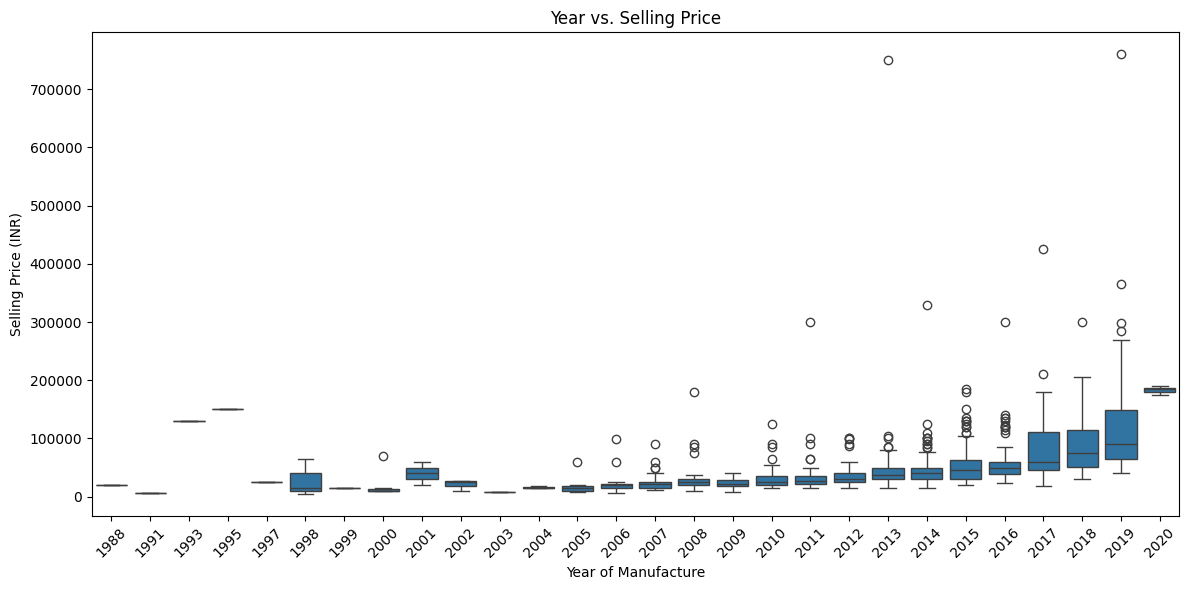

In [17]:
# Q12: Bivariate analysis between year and selling_price
plt.figure(figsize=(12,6))
sns.boxplot(x='year', y='selling_price', data=df_no_outliers)
plt.title('Year vs. Selling Price')
plt.xticks(rotation=45)
plt.xlabel('Year of Manufacture')
plt.ylabel('Selling Price (INR)')
plt.tight_layout()
plt.show()

In [21]:
# Q13: Safely calculate age and depreciation
# Create a safe copy to avoid SettingWithCopyWarning
df_no_outliers = df_no_outliers.copy()

# Calculate current year
current_year = datetime.now().year

# Add new columns
df_no_outliers['age'] = current_year - df_no_outliers['year']
df_no_outliers['depreciation'] = df_no_outliers['ex_showroom_price'] - df_no_outliers['selling_price']

# Average depreciation by age
avg_depreciation = df_no_outliers.groupby('age')['depreciation'].mean().round(2)

print("🔸 Average Depreciation by Age of Bike:")
print(avg_depreciation)

🔸 Average Depreciation by Age of Bike:
age
5    -34260.00
6      2954.56
7     13023.19
8     22307.23
9     28750.41
10    28314.29
11    34287.81
12    42766.42
13    36609.53
14    47758.75
15    46757.28
16    41398.91
17    53021.17
18    42399.00
19    39664.50
20    44852.00
21    36852.00
22         NaN
23         NaN
24    34852.00
25         NaN
26         NaN
27         NaN
28         NaN
30         NaN
32         NaN
34         NaN
37         NaN
Name: depreciation, dtype: float64


In [22]:
# Q14: Identify bikes priced significantly above the average for their year
# Compute average selling price by year
avg_price_by_year = df_no_outliers.groupby('year')['selling_price'].mean()

# Add column safely
df_no_outliers['avg_price_year'] = df_no_outliers['year'].map(avg_price_by_year)

# Filter high-priced bikes
high_priced_bikes = df_no_outliers[df_no_outliers['selling_price'] > 1.5 * df_no_outliers['avg_price_year']]

print(f"🔸 Number of significantly overpriced bikes: {high_priced_bikes.shape[0]}")
print(high_priced_bikes[['name', 'year', 'selling_price', 'avg_price_year']].head())

🔸 Number of significantly overpriced bikes: 155
                                    name  year  selling_price  avg_price_year
2    Royal Enfield Classic Gunmetal Grey  2018         150000    87660.374046
7   Royal Enfield Bullet 350 [2007-2011]  2008         180000    36404.000000
13                         Yamaha YZF R3  2019         365000   119689.511628
18   Royal Enfield Classic Gunmetal Grey  2018         150000    87660.374046
23                         Jawa Standard  2019         180000   119689.511628


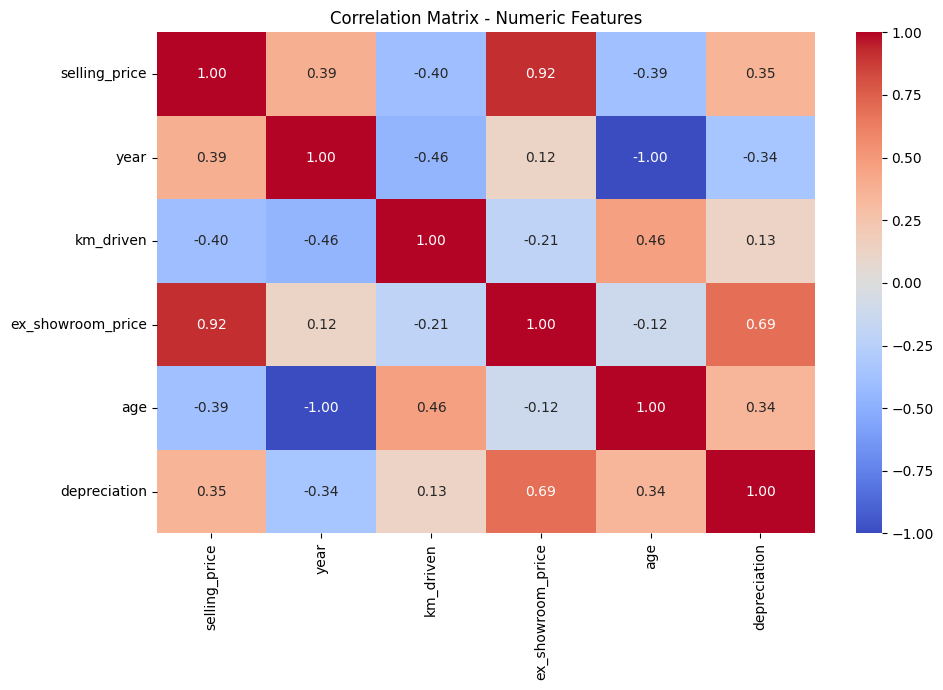

In [20]:
# Q15: Correlation matrix and heatmap
corr_matrix = df_no_outliers[['selling_price', 'year', 'km_driven', 'ex_showroom_price', 'age', 'depreciation']].corr()

plt.figure(figsize=(10,7))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix - Numeric Features')
plt.tight_layout()
plt.show()